In [2]:
!pip install pandas

/bin/bash: /home/vtpldedpy/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv("./dataset/train.csv")

In [4]:
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [6]:
X.shape

(42000, 784)

In [7]:
y.shape

(42000,)

In [8]:
from sklearn.model_selection import train_test_split

# X_subset, _, y_subset, _ = train_test_split(X, y, train_size=40000, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

param = {
    "svm__C":[0.1, 1, 10],
    "svm__gamma":['scale', 'auto'],
    "svm__kernel":["linear", "rbf", "poly"]
}

In [10]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline,param, cv = 5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [11]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}
Best cross-validation accuracy: 0.9697


In [12]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=10, kernel='poly'))])

In [13]:
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9718


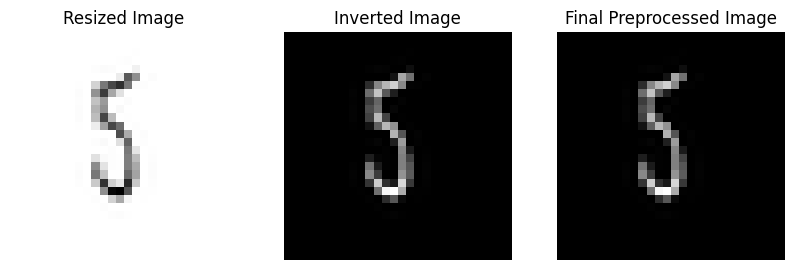

Predicted digit: 1


In [18]:
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Preprocess an image to match the MNIST format."""
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(2.0)  # Enhance contrast
    img = img.resize((28, 28), Image.Resampling.LANCZOS)  # Resize to 28x28 using LANCZOS filter
    
    # Visualize the intermediate steps
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Resized Image')
    plt.axis('off')
    
    img_array = np.array(img)
    img_array = 255 - img_array  # Invert colors: MNIST has white digits on black background
    
    plt.subplot(1, 3, 2)
    plt.imshow(img_array, cmap='gray')
    plt.title('Inverted Image')
    plt.axis('off')
    
    img_array = img_array / 255.0  # Normalize to [0, 1] range
    img_array = img_array.flatten().reshape(1, -1)  # Flatten and reshape for the model
    
    plt.subplot(1, 3, 3)
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title('Final Preprocessed Image')
    plt.axis('off')
    
    plt.show()
    
    return img_array

def predict_digit(image_path):
    """Predict the digit in the given image."""
    img_array = preprocess_image(image_path)
    prediction = best_model.predict(img_array)
    return prediction[0]

# Example usage
image_path = './test.png'  # Use the provided image path
predicted_digit = predict_digit(image_path)
print(f"Predicted digit: {predicted_digit}")